# Seattle Airbnb Analysis

## by Punith Kesarkar

## Preliminary Wrangling
> <b> This is the Bay Wheels bicycle sharing service dataset. This company motivates  bicycling as an alternative transportation option. We will explore the trends within this dataset. The fields in the dataset are: </b>

> - listing_id
> - date
> - available
> - price
> - id
> - listing_url
> - scrape_id
> - last_scraped
> - name
> - summary
> - space
> - description
> - experiences_offered
> - neighborhood_overview
> - notes
> - transit
> - thumbnail_url
> - medium_url
> - picture_url
> - xl_picture_url
> - host_id
> - host_url
> - host_name
> - host_since
> - host_location
> - host_about
> - host_response_time
> - host_response_rate
> - host_acceptance_rate
> - host_is_superhost
> - host_thumbnail_url
> - host_picture_url
> - host_neighbourhood
> - host_listings_count
> - host_total_listings_count
> - host_verifications
> - host_has_profile_pic
> - host_identity_verified
> - street
> - neighbourhood
> - neighbourhood_cleansed
> - neighbourhood_group_cleansed
> - city
> - state
> - zipcode
> - market
> - smart_location
> - country_code
> - country
> - latitude
> - longitude
> - is_location_exact
> - property_type
> - room_type
> - accommodates
> - bathrooms
> - bedrooms
> - beds
> - bed_type
> - amenities
> - square_feet
> - weekly_price
> - monthly_price
> - security_deposit
> - cleaning_fee
> - guests_included
> - extra_people
> - minimum_nights
> - maximum_nights
> - calendar_updated
> - has_availability
> - availability_30
> - availability_60
> - availability_90
> - availability_365
> - calendar_last_scraped
> - number_of_reviews
> - first_review
> - last_review
> - review_scores_rating
> - review_scores_accuracy
> - review_scores_cleanliness
> - review_scores_checkin
> - review_scores_communication
> - review_scores_location
> - review_scores_value
> - requires_license
> - license
> - jurisdiction_names
> - instant_bookable
> - cancellation_policy
> - require_guest_profile_picture
> - require_guest_phone_verification
> - calculated_host_listings_count
> - reviews_per_month
> - reviewer_id
> - reviewer_name
> - comments


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### What is the structure of your dataset?

### GATHER 
> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [62]:
import pandas as pd
import glob

path = r'C:\Users\punith.kesarkar\Documents\Data Science Nanodegree\airbnb_analysis_seattle_data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [63]:
frame.head(2)

,listing_id,date,available,price,id,listing_url,scrape_id,last_scraped,name,summary,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,reviewer_id,reviewer_name,comments
0,241032.0,2016-01-04,t,$85.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,241032.0,2016-01-05,t,$85.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ASSESS
> - Check the dtypes to see if anything needs to be converted
> - Quality - we will filter listings that have a price
> - Quality - there are a lot of columns with nulls in this dataset. 
> - Quality - date is in object format and needs to be converted to date format
> - Check for duplicates
> - Check for nulls

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482237 entries, 0 to 1482236
Data columns (total 98 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   listing_id                        1478419 non-null  float64
 1   date                              1478419 non-null  object 
 2   available                         1393570 non-null  object 
 3   price                             938360 non-null   object 
 4   id                                88667 non-null    float64
 5   listing_url                       3818 non-null     object 
 6   scrape_id                         3818 non-null     float64
 7   last_scraped                      3818 non-null     object 
 8   name                              3818 non-null     object 
 9   summary                           3641 non-null     object 
 10  space                             3249 non-null     object 
 11  description                       381

### CLEANING


> - DEFINE: convert start and end time to datetime pandas
> - CODE: use dropna() on whole dataframe
> - TEST - check info

In [66]:
frame['first_review'] = pd.to_datetime(frame['first_review'] )
frame['first_review'].dtypes

dtype('<M8[ns]')

In [67]:
frame['last_review'] = pd.to_datetime(frame['last_review'] )
frame['last_review'].dtypes

dtype('<M8[ns]')


> - DEFINE: Check duplicates
> - CODE: get all duplicate rows and remove them if there any
> - TEST - check if duplicates still exist

In [6]:
frame[frame.duplicated()]

,listing_id,date,available,price,id,listing_url,scrape_id,last_scraped,name,summary,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,reviewer_id,reviewer_name,comments



> - DEFINE: Check nulls
> - CODE: get all columns that have a price
> - TEST - check if null still exist

In [9]:
null_columns=frame.columns[frame.isnull().any()]
frame[null_columns].isnull().sum()

listing_id                           3818
date                                 3818
available                           88667
price                              543877
id                                1393570
                                   ...   
calculated_host_listings_count    1478419
reviews_per_month                 1479046
reviewer_id                       1397388
reviewer_name                     1397388
comments                          1397406
Length: 98, dtype: int64

In [10]:
frame = frame[frame.price.notnull()]

In [11]:
null_columns=frame.columns[frame.isnull().any()]
frame[null_columns].isnull().sum()

listing_id                          3818
date                                3818
available                           3818
id                                934542
listing_url                       934542
                                   ...  
calculated_host_listings_count    934542
reviews_per_month                 935169
reviewer_id                       938360
reviewer_name                     938360
comments                          938360
Length: 97, dtype: int64


> - DEFINE: Check relationships between fields and keep the columns that I want to work with.
> - CODE: use hist() chart to check the relationships and keep columns of inteest
> - TEST - create a new dataset which is the copy of the original of dataset with required columns

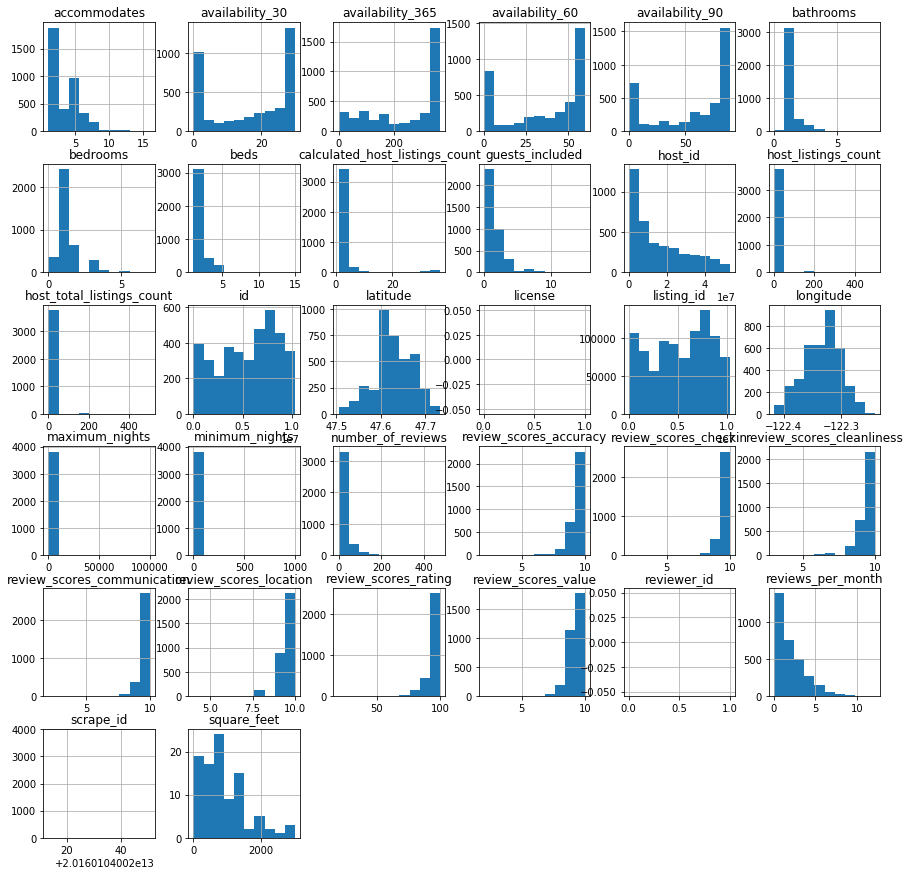

In [16]:
frame.hist(figsize=(15,15));


> - DEFINE: We will create a Reviewers dataset to analyze insights about ratings
> - CODE: create copy of dataset with 2 datadframes each for reviews and availability
> - TEST - create 2 dataframes

In [110]:
frame_reviewers = frame[['first_review',
                        'last_review', 
                         'price',
                        'number_of_reviews',
                        'review_scores_rating',
                        'review_scores_accuracy',
                        'review_scores_cleanliness',
                        'review_scores_checkin',
                        'review_scores_communication',
                        'review_scores_location',
                        'review_scores_value',
                         'maximum_nights',
                         'host_total_listings_count',
                         'bedrooms',
                         'guests_included',
                         'transit',
                         'latitude',
                         'longitude',
                         'square_feet'
]]

In [31]:
frame_reviewers = frame_reviewers[frame_reviewers.number_of_reviews.notnull()]
frame_reviewers = frame_reviewers[frame_reviewers.number_of_reviews>0]

In [32]:
frame_reviewers

,first_review,last_review,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,maximum_nights,host_total_listings_count,bedrooms,guests_included,transit,latitude,longitude
1393570,2011-11-01,2016-01-02,$85.00,207.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,365.0,3.0,1.0,2.0,NaN,47.636289,-122.371025
1393571,2013-08-19,2015-12-29,$150.00,43.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,90.0,6.0,1.0,1.0,"Convenient bus stops are just down the block, ...",47.639123,-122.365666
1393572,2014-07-30,2015-09-03,$975.00,20.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,30.0,2.0,5.0,10.0,A bus stop is just 2 blocks away. Easy bus a...,47.629724,-122.369483
1393574,2012-07-10,2015-10-24,$450.00,38.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1125.0,2.0,3.0,6.0,The nearest public transit bus (D Line) is 2 b...,47.632918,-122.372471
1393575,2015-06-11,2015-09-28,$120.00,17.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,1.0,1.0,1.0,The #1 and #2 bus picks up 2-3 blocks away (di...,47.630525,-122.366174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397380,2015-10-01,2015-12-27,$154.00,5.0,92.0,9.0,8.0,10.0,10.0,10.0,8.0,14.0,1.0,2.0,4.0,We're centrally located to several bus stops t...,47.654205,-122.352604
1397381,2015-10-01,2015-10-16,$65.00,2.0,100.0,9.0,8.0,10.0,10.0,10.0,10.0,1125.0,1.0,1.0,1.0,How to Get to: UW/Husky Stadium): 10 minute d...,47.657898,-122.346692
1397382,2014-07-08,2015-12-29,$95.00,73.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0,365.0,3.0,1.0,2.0,The apartment is easily accessed from I-5 Nort...,47.654516,-122.358124
1397383,2015-09-27,2015-09-27,$359.00,1.0,80.0,8.0,10.0,4.0,8.0,10.0,8.0,1125.0,354.0,3.0,1.0,NaN,47.664295,-122.359170


In [40]:
frame_reviewers['first_review'] = pd.to_datetime(frame_reviewers['first_review'] )
frame_reviewers['first_review'].dtypes

dtype('<M8[ns]')

In [41]:
frame_reviewers['last_review'] = pd.to_datetime(frame_reviewers['last_review'] )
frame_reviewers['last_review'].dtypes

dtype('<M8[ns]')

## What is the trend of the reviews yearly?

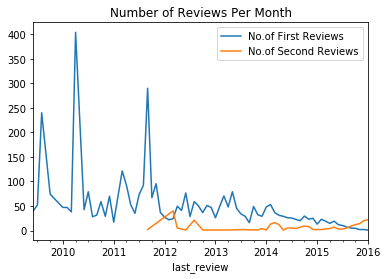

In [48]:
frame_reviewers.groupby(frame_reviewers['first_review'].dt.to_period("M")).median()['number_of_reviews'].plot(label='No.of First Reviews')
frame_reviewers.groupby(frame_reviewers['last_review'].dt.to_period("M")).median()['number_of_reviews'].plot(label='No.of Second Reviews')
plt.legend()
plt.title('Number of Reviews Per Month');

Number of reviews per month have been dropped significantly in 2012 and having been on a steady decline ever since. 

## How many reviews are received between the first and last reviews? 

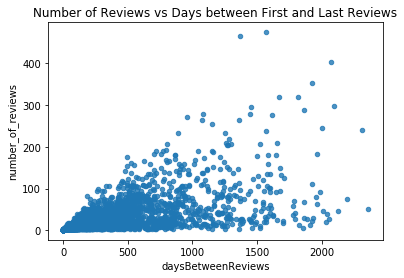

In [52]:
frame_reviewers['daysBetweenReviews'] = frame_reviewers['last_review'] - frame_reviewers['first_review']
frame_reviewers['daysBetweenReviews']  = frame_reviewers['daysBetweenReviews'] /  np.timedelta64(1, 'D')


import matplotlib.pyplot as plt
frame_reviewers.plot(kind="scatter", x="daysBetweenReviews", y="number_of_reviews", alpha=0.8)
plt.title('Number of Reviews vs Days between First and Last Reviews')
plt.show()

In [111]:
frame['price'] = (frame['price'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

100 reivews are within 1000 days. So it could mean that clients that stay longer than 2 years tend to leave fewer reviews on the website. 

## What range of prices are the most popular in Seattle? 

In [74]:
#Most of the prices are within 200$ range - lets see a breakdown of these costs per latitude /longitude breakdown
frame.price.value_counts()

150.0    36808
100.0    31914
75.0     29938
125.0    27643
65.0     26519
         ...  
686.0        1
685.0        1
683.0        1
676.0        1
711.0        1
Name: price, Length: 669, dtype: int64

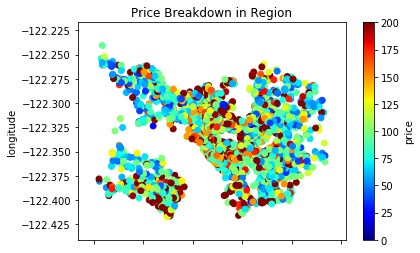

In [76]:
sc = frame.plot.scatter('latitude', 'longitude', c='price',vmin=0, vmax=200, s=35, colormap='jet')
plt.title('Price Breakdown in Region')
plt.show();


Most of the prices are within 75-100$ range 

## Which part of Seattle has the highest ratings?

In [77]:
#Most of the rations within 80-100 range - lets see a breakdown of these ratings per latitude /longitude breakdown
frame.review_scores_rating.value_counts()

100.0    781
98.0     292
96.0     278
97.0     266
95.0     260
94.0     198
93.0     184
99.0     146
90.0     138
80.0     111
92.0     105
91.0      97
87.0      55
89.0      53
88.0      47
85.0      24
84.0      23
86.0      17
83.0      13
60.0      12
82.0      10
70.0       8
73.0       7
76.0       5
72.0       4
40.0       4
77.0       4
78.0       4
75.0       3
71.0       3
81.0       3
74.0       2
79.0       2
68.0       2
67.0       2
66.0       2
65.0       1
64.0       1
57.0       1
55.0       1
53.0       1
20.0       1
Name: review_scores_rating, dtype: int64

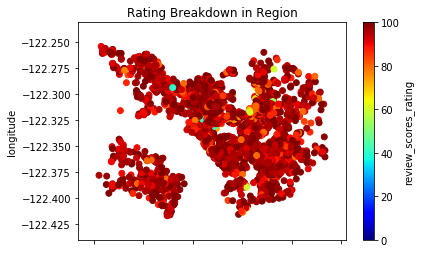

In [78]:
sc = frame.plot.scatter('latitude', 'longitude', c='review_scores_rating',vmin=0, vmax=100, s=35, colormap='jet')
plt.title('Rating Breakdown in Region')
plt.show();


Most of the area is filled with really high ratings. 

## What features of the airbnb tend to factor in to receive high ratings? 

In [112]:
frame_reviewers['reviewScoreBin'] = np.where(frame_reviewers.review_scores_rating>=80,"80-100",
                                np.where((frame_reviewers.review_scores_rating<80) & (frame_reviewers.review_scores_rating>=60), "60-80",
                            np.where((frame_reviewers.review_scores_rating<60) & (frame_reviewers.review_scores_rating>=40), "40-60","below 40")))
                                                                           

In [82]:
frame_reviewers = frame_reviewers[frame_reviewers.review_scores_rating.notnull()]

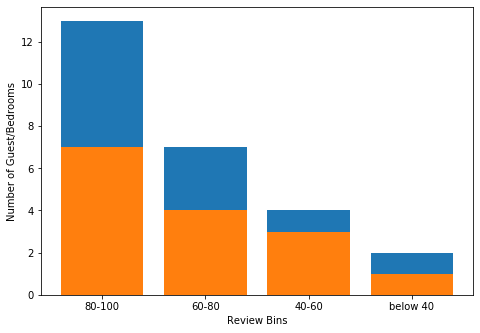

In [89]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
binR = frame_reviewers['reviewScoreBin'] 
rev1 = frame_reviewers.guests_included
rev2 = frame_reviewers.bedrooms
ax.bar(binR,rev1)
ax.bar(binR,rev2)
ax.set_ylabel('Number of Guest/Bedrooms')
ax.set_xlabel('Review Bins')
plt.show();

Review score is correlated with the number of guests allowed and bedrooms offered in the listing.

## What percetange of the airbnb guests used transit? 

In [91]:
#Proportion of the reviewers that took transit vs did not take transit
frame_reviewers[frame_reviewers.transit.notnull()]['number_of_reviews'].sum()

70110.0

In [93]:
frame_reviewers.number_of_reviews.sum()

84829.0

In [94]:
frame_reviewers[frame_reviewers.transit.notnull()]['number_of_reviews'].sum() / frame_reviewers.number_of_reviews.sum()

0.8264862252295795


82% of the airbnb customers took transit around the city.

## How does square feet of a location factor for ratings?

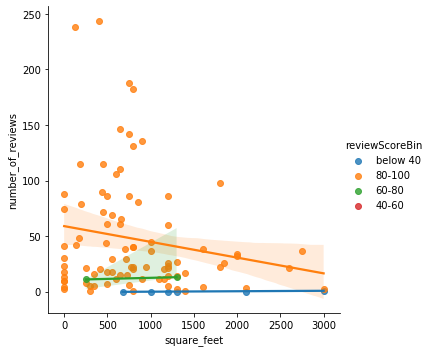

In [115]:
import seaborn as sns

sb.lmplot(data = frame_reviewers, x = 'square_feet', y = 'number_of_reviews',hue='reviewScoreBin');


There is a negative correlation between the square feet of the house vs the number of reviews received. 